<a href="https://colab.research.google.com/github/HarukiHenrike/BasesComputacionais/blob/master/ProjetoBCCDanielZamboniElesb%C3%A3oeLuizHenriquedaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Final da Disciplina Bases Computacionais da Ciência Q3.2022 21h
Estudo 

Daniel Zamboni Elesbão - RA: 11202230222

Luiz Henrique da Silva - RA: 11202231412

In [70]:
#Estudo estatístico comparativo entre o Índice de Desenvolvimento Humano (IDH ou HDR na sigla em inglês) das 
#Nações Unidas e o Índice de Percepção da Corrupção (CPI) da Transparência Internacional
#Projeto com inspiração na disciplina 'Estado e Relações de Poder'
import matplotlib.pyplot as plt #importa a biblioteca mathplotlib como plt
import pandas as pd #importa a biblioteca pandas como pd
hdr21 = pd.read_csv('https://raw.githubusercontent.com/daniel-elesbao/BasesComputacionais/master/HDR21-22_Composite_indices_complete_time_series2.csv')
#Lê o CSV com o ranking do Índice de Desenvolvimento Humano das Nações Unidas de 2021
cpi21 = pd.read_excel('https://raw.githubusercontent.com/daniel-elesbao/BasesComputacionais/master/CPI2021_GlobalResults&Trends.xlsx')
#Lê planilha Excel com o índice de percepção de corrupção da transparência internacional de 2021
cpi21 = cpi21.drop(labels=[0,1], axis=0) #remove as duas primeiras linhas do DataFrame, sem dados relevantes
cpi21 = cpi21.rename(columns={'Unnamed: 1': 'ISO3','Unnamed: 3': 'CPI'}) #renomeia as colunas com as informações relevantes
descor = pd.merge(cpi21, hdr21, left_on='ISO3', right_on='iso3') #funde os Dataframes alinhando os dados dos países pela padronização do nome ISO3
descor = descor[['ISO3','CPI','iso3','hdi_rank_2021']] #remove todas as colunas exceto as que tem as informações relevantes para o escopo do projeto

display (descor)

,ISO3,CPI,iso3,hdi_rank_2021
0,DNK,88,DNK,6.0
1,FIN,88,FIN,11.0
2,NZL,88,NZL,13.0
3,NOR,85,NOR,2.0
4,SGP,85,SGP,12.0
...,...,...,...,...
170,AFG,16,AFG,180.0
171,YEM,16,YEM,183.0
172,VEN,14,VEN,120.0
173,SYR,13,SYR,150.0


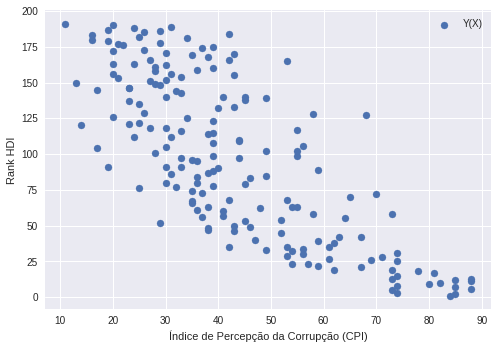

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plb

X = descor["CPI"].values
Y = descor["hdi_rank_2021"].values

plt.scatter(X,Y,label='Y(X)');
plt.xlabel('Índice de Percepção da Corrupção (CPI)');
plt.ylabel('Rank HDI');
plt.legend();

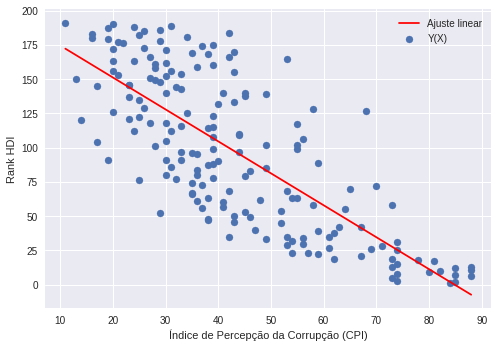

In [77]:
media_X = np.mean(X)
media_Y = np.mean(Y)
erro_x = X-media_X
erro_y = Y-media_Y
soma_erro_xy = np.sum(erro_x*erro_y)
erro_x_quadratico = (X-media_X)**2.0
soma_erro_x_quadratico = np.sum(erro_x_quadratico)
m = soma_erro_xy / soma_erro_x_quadratico
c = media_Y - m*media_X
reta = m*X+c
plt.scatter(X,Y,label='Y(X)');
plt.plot(X,reta,label='Ajuste linear',color='red');
plt.xlabel('Índice de Percepção da Corrupção (CPI)');
plt.ylabel('Rank HDI');
plt.legend();

Dados internacionais para o projeto
https://www.transparency.org/en/cpi/2021
https://hdr.undp.org/data-center